$Step-1$:
    
**Import required packages**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

$Step-2$

**Read the data**

In [46]:
# read the dataset 

df = pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.dropna(inplace=True) # Drop the Null
df.reset_index(drop=True,
               inplace=True)
df.head()

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

##### We need to perform EDA
##### but we have complete Numerical data

- We divide data into two parts i.e input data and output data

- input data = X; output data=y

- Again we divide input data into two parts i.e train and test

- input train data= x_train; input test data= x_test

- similarly we divide output data into two parts i.e train and test

- output train data= y_train; output test data= y_test

- Model development happens on train data i.e x_train and y_train

- Model will predict by passing x_test data, these are called y_predictions

- y_predictions will compare with y_test , this is called test accuracy/ test error

In [ ]:
#x_train   y_train
#1           1
#2           4
#3           9
#4           16

#x_test    y_test
#5         25

#develope a model (1,1) (2,4) (3,9) (4,16)
#model will predict by passing 5 , y_predictions  we need to compare with y_test 

$Step-3$

**divide data into input and output data**

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [47]:
X=df.drop('quality',axis=1)
y=df['quality']

$Step-4$

**Divide data into train and test**

- Will use train test split from sklearn model selection

- It will take following parameters

    - X: input data
    
    - y: output data
    
    - test size = 0.3, 30% test data 70% train data
    
    - by default 75:25
    
    - random state
    
        - we want select observations randomly
        
        - many possibile combinations
        
        - Every possibile combination represent as a number
        
        - 1,2,3,4,5,6,7,8,9,10
        
        - Select 5 numbers randomly : how many combiantions
        
        - random state=42 
        
        - random state= 1234

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)


**Check point-1**

$Check$ $the$ $shape$

In [17]:
#df.shape
#X:11   y:1
#1599 = 100
#?    = 30

#1599*30/100

#test data has  480
#train data has 1599-480=1119 

#df      : 12  column  1599 rows   (1599,12)
#X_train : 11 columns  1119 rows   (1119,11)
#X_test  : 11 columns   480 rows   (480,11)
#y_train :  1  column  1119 rows   (1119,)
#y_test  :  1  column   480 rows   (480,)


# if you seee shape  (rows,columns) (480,1) === data farme
# if you see  shape  (rows,)        (480,)  === series

In [10]:
X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [11]:
y_train.shape, y_test.shape

((1119,), (480,))

In [12]:
print("the shape of data frame is:",df.shape)
print("the shape of X_train is:",X_train.shape)
print("the shape of X_test frame is:",X_test.shape)
print("the shape of y_train frame is:",y_train.shape)
print("the shape of y_test frame is:",y_test.shape)

the shape of data frame is: (1599, 12)
the shape of X_train is: (1119, 11)
the shape of X_test frame is: (480, 11)
the shape of y_train frame is: (1119,)
the shape of y_test frame is: (480,)


**Check point-2**:
    
- Check the observation indexes of X_train and y_train both should match
    
- similarly X_test and y_test both should match

In [13]:
X_train  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
642,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4
678,8.3,0.780,0.10,2.6,0.081,45.0,87.0,0.99830,3.48,0.53,10.0
412,7.1,0.735,0.16,1.9,0.100,15.0,77.0,0.99660,3.27,0.64,9.3
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2
985,7.4,0.580,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.3
...,...,...,...,...,...,...,...,...,...,...,...
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6
1077,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0
1318,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8
723,7.1,0.310,0.30,2.2,0.053,36.0,127.0,0.99650,2.94,1.62,9.5


In [15]:
y_train

642     5
678     5
412     5
73      4
985     6
       ..
1228    7
1077    5
1318    6
723     5
815     5
Name: quality, Length: 1119, dtype: int64

In [24]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
...,...,...,...,...,...,...,...,...,...,...,...
1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6
1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8


In [16]:
y_test

688     5
961     5
726     6
537     6
1544    7
       ..
1461    4
1591    6
1045    6
1498    6
42      6
Name: quality, Length: 480, dtype: int64

In [ ]:
#df.reset_index(drop=True)

In [37]:
############## All together ##############
#Step-1: Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2:  Read the data
df = pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")
df.head()

# Step-3(Optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as NuLL  or NaN
#         if you are seeing this check it is really a missing values  
#         or  data has empty rows (alternative rows)
df.dropna(inplace=True)
df.reset_index(inplace=True)

##################### EDA ##################
#Numerical data  shoudl be ready  before go to the step-4 
############################################# 

# Step-4: Divide into X and y
X=df.drop('quality',axis=1)
y=df['quality']

# Step-5: Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)


$Step-5$

**Model development**

In [20]:
# Model development happens using train data
# X_train    y_train
#from sklearn.linear_model import LinearRegression
#LR=LinearRegression()




In [18]:
X_train.ndim
# 1 dimension means 1 column only
# 2 dimension means 2 column only
# when you have only 1 coulmn, the shape will not show the coulumn
# (21,) it is only one column data having 21 observations
# (9,) it is one column data having 9 observation
# (30,2) it is 2 column data having 30 observation
# Reshape the data if you have only one column

2

- import the package

- save the pacakge

- apply fit transform

In [ ]:
# from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes
# from sklearn.neighbors
# from sklearn.ensemble


In [38]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

$Step-6$

**Model predictions**

we need to pass X_test data

In [39]:
# Model predictions happens X_test
y_predictions=LR.predict(X_test)

In [40]:
y_predictions

array([5.16003375, 5.31953766, 5.63676143, 5.52619018, 6.32205835,
       5.37193125, 5.3719121 , 5.91871149, 5.46059174, 7.04899778,
       4.89121277, 5.17918663, 5.74106381, 5.54736268, 5.58388732,
       5.28318111, 4.89286274, 5.14001991, 6.28188786, 5.11768447,
       5.08506006, 5.91026743, 5.15683002, 5.4621841 , 5.69549208,
       6.27706905, 5.32894359, 5.53653669, 6.04632239, 5.46245841,
       4.69000624, 6.18231195, 5.20381374, 5.59886142, 5.59532988,
       5.54145688, 6.35591811, 5.19935401, 5.47422078, 5.81405986,
       5.15901727, 6.15368304, 5.6980289 , 5.37679862, 5.62456546,
       5.00325408, 4.90160543, 5.75799108, 6.35266686, 5.56118516,
       4.89973099, 5.77330403, 6.66588823, 6.1555186 , 5.35505711,
       5.07932047, 6.20786294, 5.21893484, 6.43001727, 5.2192625 ,
       5.32531268, 5.21835755, 5.05224599, 5.60678369, 5.0120603 ,
       6.17010025, 5.74020323, 6.37161258, 5.33865405, 6.06297922,
       5.73072649, 5.57753135, 5.18510358, 6.21179885, 5.53641

In [21]:
y_test.shape,y_predictions.shape

((480,), (480,))

In [25]:
X_test
# how many value =11
# our model is trained on 11 columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
...,...,...,...,...,...,...,...,...,...,...,...
1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6
1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8


In [16]:
X_test.iloc[0]  # series
# In order to pass a test sample to a model
# we need to pass a list of values
# or array of values
# tuple of values
X_test.iloc[0].values

array([7.7   , 0.66  , 0.04  , 1.6   , 0.039 , 4.    , 9.    , 0.9962,
       3.4   , 0.47  , 9.4   ])

In [17]:
LR.predict([X_test.iloc[0].values,
            X_test.iloc[1].values])

array([5.15272674, 5.32546327])

**Batch predictions**

  - After model development we pass a batch of input

  - In the above examples we are passing 480 observations/tuple at a time

  - This is called as Batch prediction

**Real time or Endpoint prediction**

  - After model development will pass a single observation

  - It will give the quick response

  - So that it is called as Real time prediction

**Note**

   - Number of values we are passing in a list = number of columns

   - On how many columns your model trained, that many values only model consider

In [18]:
ip1=[1,2,3,4,5,6,7,8,9,10,11]
LR.predict([ip1])

array([-82.48338949])

In [40]:
X_test.shape,y_test.shape,y_predictions.shape
# 480 input , 480 original output, 480 model output

((480, 11), (480,), (480,))

In [19]:
test_data=X_test
test_data['y_actual']=y_test
test_data['y_predictions']=y_predictions
test_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_actual,y_predictions
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5,5.152727
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3,5,5.325463
726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1,6,5.636625
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6,5.512458
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7,6.355885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4,5.163071
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,5.556391
1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6,6.167418
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6,5.271424


In [48]:
# y_test is series
# y_predictions is numpy array values
print(y_test.values[:5])  # float 5. means 5.0
print(y_predictions[:5])

[5 5 6 6 7]
[5.15272674 5.32546327 5.63662519 5.51245819 6.35588496]


$Step-7$

**Model evaluation**

In [20]:
# RMSE
# MSE
# MAE
# R-square

from sklearn.metrics import r2_score,mean_squared_error

In [21]:
R2=r2_score(y_test,y_predictions)
MSE=mean_squared_error(y_test,y_predictions)
#MSE**(1/2)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

R-sqaure: 0.31285862790752406
MSE: 0.39185847231164284
RMSE: 0.6259860000923686


# MSE formulae
<img class="XqHOTb IGEbUc" alt="\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2" src="https://www.gstatic.com/education/formulas2/553212783/en/mean_squared_error.svg" role="img" data-csiid="25" data-atf="0">

- Step-1: we already has y_actual (y_test) data and y_predictions(model predictions)

- Step-2: Through a for loop will call each value, and subtract both

- Step-3: Square the subtractions and append in a list

- Step-4: Get the sum of all the values in a list

- Step-5: Divide by len(y_test) or len(y_predictions)

In [22]:
s=0
for i in range(len(y_test)):
    v1=y_test.values[i]-y_predictions[i]
    v2=v1**2
    s=s+v2
print(s/len(y_test))

0.3918584723116428


In [ ]:
v1=[(1,2),(3,5),(5,7))
v2=(10,20)

# calculate the distance between each point in v1 with v2

$Step-8$

**Finding coeffiecnt and Intercept**

- Coefficient means b0 ,b1 ,b2....

- Coeffiecints depends on number of input features

- In this data we have only one column as input i.e. Years of Experience

- So we will get only one coeffiecnt

In [23]:
LR.coef_
print("The coeffiecnt of Years_of_experience is:",LR.coef_)

The coeffiecnt of Years_of_experience is: [ 2.86163946e-02 -1.17907625e+00 -2.55897983e-01  4.14316493e-03
 -1.54784393e+00  6.49596171e-03 -3.95580696e-03 -1.20899746e+01
 -4.30288140e-01  9.60801101e-01  2.93739795e-01]


In [ ]:
2.86163946e-02*()+

In [24]:
LR.intercept_

16.07844379344555

In [33]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [35]:
#Regression_equation=LR.intercept_+LR.coef_ * col namee
#Regression_equation

y=16.07+2.86163946e-02*fixed acidity+-1.17907625e+00*volatile acidity

$Step-9$

**Plot the regression line**

- In order to plot regression line

- We need to undertsand the two plots

- Orginal data plot i.e input data(X) vs output data(y)

- Regression plot i.e input data (X) vs predictions of regression model by passing input data (X)

In [27]:
# Draw the regression line on original data vs predictions on original data

#original_y_predictions=LR.predict(X.array.reshape(-1,1))
#plt.scatter(X,y,label='original data')  # Original plot
#plt.plot(X,original_y_predictions,color='red') # Regression plot

## Feature selection in Regression problems

- p-value concept

    - H_o :  There is no relation between Independent variable and dependent variable

    - H_a :  There is a relation between Independent variable and dependent variable

        - p>alpha : Not Reject the Null hypothesis

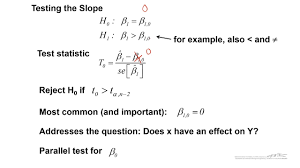

**Sklearn package will not give the p-value**

**so for p-values we need to stats model package**

**Inside stats model we have OLS method avialable**

$Step-10$

**Stas.OLS method**

In [25]:
from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              7512.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:15:47   Log-Likelihood:                         -1115.2
No. Observations:                1119   AIC:                                      2252.
Df Residuals:                    1108   BIC:                                      2308.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0133      0.020      0.664      0.507      -0.026       0.053
volatile acidity        -1.1899      0.142     -8.354      0.000      -1.469      -0.910
citric acid             -0.2557      0.178     -1.434      0.152      -0.606       0.094
residual sugar          -0.0025      0.014     -0.178      0.859      -0.031       0.025
chlorides               -1.5735      0.494     -3.182      0.002      -2.544      -0.603
free sulfur dioxide      0.0067      0.003      2.530      0.012       0.001       0.012
total sulfur dioxide    -0.0040      0.001     -4.260      0.000      -0.006      -0.002
density                  4.3073      0.768      5.606      0.000       2.800       5.815
pH                      -0.5074      0.196     -2.587      0.010      -0.892      -0.123
sulphates                0.9424      0.133      7.109      0.000       0.682       1.203
alcohol                  0.3085      0.022     14.229      0.000       0.266       0.351
==============================================================================
Omnibus:                       13.594   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.983
Skew:                          -0.165   Prob(JB):                     0.000205
Kurtosis:                       3.506   Cond. No.                     2.41e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Based on alpha= 0.05

- We will reject 3 columns: Fixed acidity,Citric acid, Residual sugar

- Again we need to build the model by using other features

## Method-2

**Correlation between the features**

In [69]:
cols=['fixed acidity','citric acid','residual sugar']
new_data=df.drop(cols,axis=1)
new_data

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,0.700,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,0.600,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,0.550,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,0.510,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,0.645,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [71]:
new_data.corr()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
chlorides,0.061298,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.010504,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,0.076470,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.022026,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.234937,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,-0.260987,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.202288,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166
quality,-0.390558,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166,1.000000


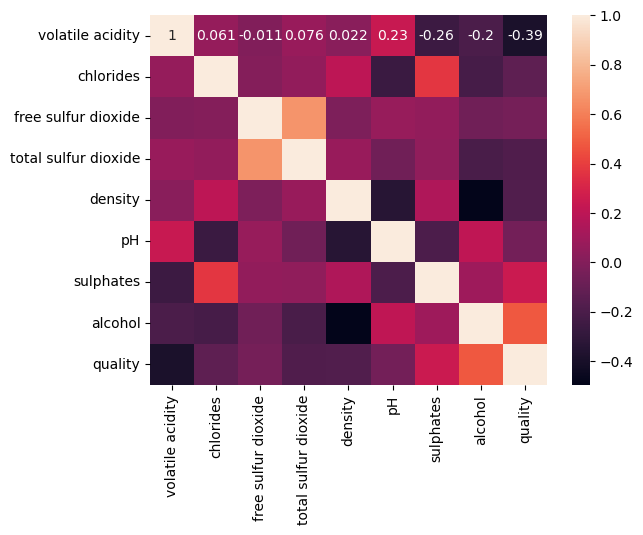

In [78]:
import seaborn as sns

corr_mat=new_data.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

- From above corelation

    - Total sulphar dioxide and free sulpher dioxide are highly postive correlated

    - 0.667

    - we can use any one of the column
 
    - Remove the column which is having less relation with Target data

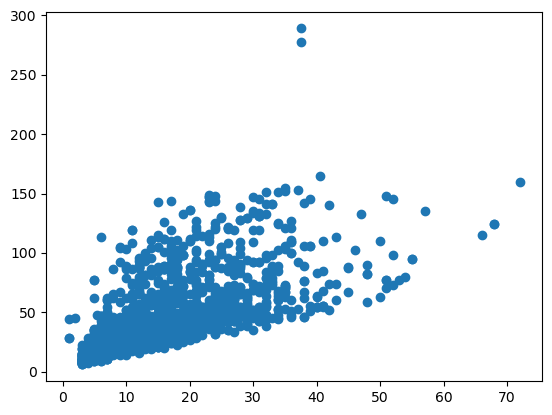

In [80]:
new_data.columns
col1=new_data['free sulfur dioxide']
col2=new_data['total sulfur dioxide']
plt.scatter(col1,col2)

**Meethod-3**

$variance$ $theshold$ $method$

- Varaince threshold method

- some time column values are not vary much

- For example in Loan prediction data : we have a column loan term 360

- The data is not vary across , then we can remove those column

- Every data has some variance avialable

- if the variance is zero means , the data is not varying

- the data has most of the time only one value is there

- It is available sklearn.feature selection

In [ ]:
## All together

################################## Data into two parts############################################
X=df['YearsExperience']  
y=df['Salary']


################################ Train test split #################################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)

#########################Model predictions happens X_test############################################
y_predictions=LR.predict(X_test.array.reshape(-1, 1))


######################### Metrics######################################################################

from sklearn.metrics import r2_score,mean_squared_error
R2=r2_score(y_test,y_predictions)
MSE=mean_squared_error(y_test,y_predictions)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

In [27]:
# Make sure LR is ready
# LR should train with 11 columns
# do not run any feature selection techniues
# Run till step-9 only
LR.predict([[1,2,3,4,5,6,7,8,9,10,11]])

array([-82.48338949])

$Step-11$:
    
**Save the model**

- once model developed we need to save the model

- that model can use by any one

- Model we can save in different formats

    - pickle   .pkl

    - joblib   .joblib

    - save( in deep learning)

In [41]:
import pickle
pickle.dump(LR,
            open('linear_wine_model.pkl','wb'))

#Model name=LR
#In which name the model is saving: linear_wine_model
# extenstion:.pkl
# wb: write in bytes

$Step-12$:

**Load the model**

In [42]:
# Loading model to compare the results
model = pickle.load(open('linear_wine_model.pkl','rb'))
model

LinearRegression()

$Step-13$:
    
**Predictions**

In [43]:
X_test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
688,688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4
961,961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
726,726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1
537,537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
1544,1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0
1591,1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6
1045,1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4
1498,1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8


In [36]:
X_test.values

array([[ 7.7  ,  0.66 ,  0.04 , ...,  3.4  ,  0.47 ,  9.4  ],
       [ 7.1  ,  0.56 ,  0.14 , ...,  3.27 ,  0.62 ,  9.3  ],
       [ 8.1  ,  0.72 ,  0.09 , ...,  3.43 ,  0.72 , 11.1  ],
       ...,
       [ 6.9  ,  0.44 ,  0.   , ...,  3.32 ,  0.58 , 11.4  ],
       [ 6.6  ,  0.895,  0.04 , ...,  3.53 ,  0.58 , 10.8  ],
       [ 7.5  ,  0.49 ,  0.2  , ...,  3.21 ,  0.9  , 10.5  ]])

In [38]:
len(X_test.columns)

11

In [44]:
model.predict([[1,2,3,4,5,6,7,8,9,10,11]])
# the input columns are 11
# so we need pass 11 values as list

ValueError: X has 11 features, but LinearRegression is expecting 12 features as input.

In [36]:
X_test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
688,688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4
961,961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
726,726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1
537,537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
1544,1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0
1591,1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6
1045,1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4
1498,1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8


In [35]:
model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- index


In [37]:
import os
os.getcwd()

'C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Data science\\Batch-2_July3\\ML python\\Linear_regression'

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [41]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [42]:
input_cols=['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar','chlorides', 'free sulfur dioxide', 
                'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

#val1=input()
#val2=input()
#val11=input()
#list1=[v1,v2]

list1=[]
for i in input_cols:
    val=input()
    list1.append(eval(val))

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
1
2
3
4
5
6
7
8
9
10
11


In [43]:
list1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [45]:
model.predict([list1])

array([-82.48338949])

In [53]:
############## All together ##############
#Step-1: Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step-2:  Read the data
df = pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")
df.head()

# Step-3(Optional): If you are seeing any duplicates
#         or data has empty rows when you read it display as NuLL  or NaN
#         if you are seeing this check it is really a missing values  
#         or  data has empty rows (alternative rows)
#df.dropna(inplace=True)
#df.reset_index(inplace=True)

##################### EDA ##################
#Numerical data  shoudl be ready  before go to the step-4 
############################################# 

# Step-4: Divide into X and y
X=df.drop('quality',axis=1)
y=df['quality']

# Step-5: Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)
print(X_train.shape)

# Step-6: Develop the model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

# Step-7: Save the model
import pickle
pickle.dump(LR,
            open('linear_wine_model.pkl','wb'))


(1119, 11)


In [54]:
# Loading model to compare the results
model = pickle.load(open('linear_wine_model.pkl','rb'))
model

LinearRegression()

In [55]:
model.predict([[1,2,3,4,5,6,7,8,9,10,11]])

array([-82.48338949])

In [56]:
df = pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Datafiles\\winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
df.dropna()
df.reset_index(drop=True,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
X_test.to_csv("test.csv",index=False)